In [59]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler


In [60]:
df = pd.read_csv('UsArrests.csv')
features = df.iloc[:, 1:] 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [61]:
#Elbow Method 

In [62]:
wcss = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k , init='k-means++' , random_state=42 , n_init = 10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [63]:
#Silhoutte Method


In [64]:
sil_scores = []
k_range_sil = range(2,11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)

Visualization 

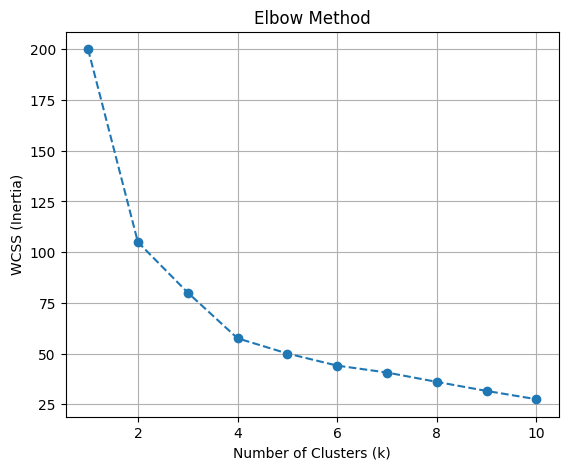

In [ ]:
# 3. Visualization
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)



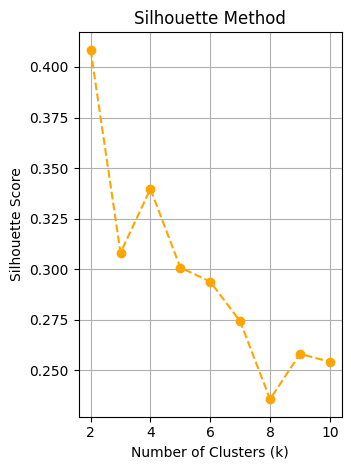

In [66]:
# Plot Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range_sil, sil_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
#K means 
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_




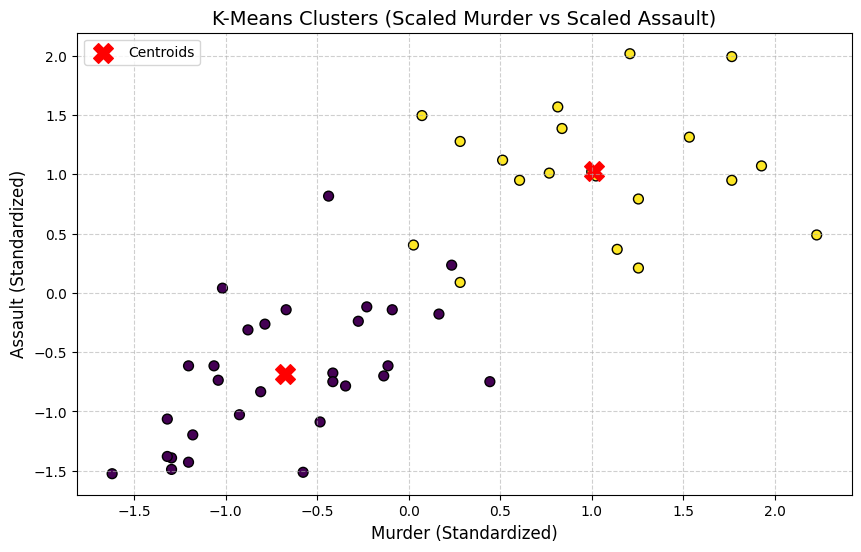

In [68]:


# 1. Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot the data points (Murder vs Assault)
# c=labels assigns a unique color to each cluster
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50, edgecolors='black')

# 2. Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# 3. Add labels and title
plt.title('K-Means Clusters (Scaled Murder vs Scaled Assault)', fontsize=14)
plt.xlabel('Murder (Standardized)', fontsize=12)
plt.ylabel('Assault (Standardized)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()